# NAME: GABRIEL HAO WEI YAP
# YID: 2024148069
***
# <font color='royalblue'>CAS 2103 - Data Structures: HW Assignment 3</font>
## Due 5/23/2025 at 11:59 PM
### Instructor: Seong Jae Hwang (seongjae@yonsei.ac.kr)

***
# <font color='royalblue'>Image Compression via Quadtree</font>
## <font color='royalblue'>Instruction</font>


### **Aims**: 
In this assignment, we aim to study **quadtree**: a tree with at most four children. We will see how a simple digital image can be stored in a quadtree and use the quadtree's structure to meaningfully compress the image via various **recursive** operations. The procedure of HW3 is overall similar to that of HW2 (i.e., follow the notebook, complete missing functions, and test them).


### **Outcomes**:
- Part 1: Store a 2D array into a quadtree and implement relevant operations. This focuses on small examples.
- Part 2: Apply Part 1 functions on real images.


### **HW3 File Structure**:
Main:
- `assignment3.ipynb`: The main `.ipynb` file to follow step by step. The goal is to step through this notebook file and reach the end. Along the way, you will find some missing functions that need to be implemented in `quadtree.py`.
- `quadtree.py`: A `.py` file with quadtree utility functions. **This contains the functions that you need to implement**.

Extra:
- `prague_square_256.png`, `rabbit.png`, `pot.png`: The images to be used for Part 2.
- `assignment3.html`: The `html` output of the provided `assignment3.ipynb`. This is just for your reference if you want to see output examples. Don't turn this in.
- Other `.png` and `.gif` files are for visualizing the instruction.


### **Functions to implement**:
1. Part 1: You will implement the following missing functions in `quadtree.py`. 
    - `build_quadtree_recursive`
    - `quadtree_to_image_recursive`
    - `compress_quadtree_recursive`
    - `count_nodes`
    - `max_num_nodes`


2. Part 2: No functions to implement. Part 2 uses the functions from Part 1.

### **Points**: 50 pts total
Correctness of the following functions in `quadtree.py`:
1. **10 pts**: `build_quadtree_recursive`
2. **10 pts**: `quadtree_to_image_recursive`
3. **10 pts**: `compress_quadtree_recursive`
4. **5 pts**: `count_nodes`
4. **5 pts**: `max_num_nodes`

Correctness of the submission format:

5. **10 pts**: Submit the following files with the **filenames specified below**:
- `assignment3.ipynb`
- `quadtree.py`

    
### **What to Submit**:
- `assignment3.ipynb` with (1) your name and ID at the top cell
- `quadtree.py` with (1) your name and ID at the top comment block and (2) your implementations.

Nothing else.

**Please, please, please** submit your files with the specified filenames: `assignment3.ipynb` and `quadtree.py`. No extra information in your filename. Also, please do **not** upload `.zip` files. Points will be taken off for submitting `.zip` files.


### **Notes** (similar to HW2 Notes):
1. Only `quadtree.py` will be tested and graded. My own `assignment3_test.ipynb` script will test your `quadtree.py`, but the test script will not be too different from this `assignment3.ipynb`. Meaning, if your implementations work well on `assignment3.ipynb`, you can expect them to work similarly well on my `assignment3_test.ipynb`.
2. You are welcome to slightly modify `assignment3.ipynb` for your convenience for testing and such, but again, the grading will be based on my own jupyter notebook to test your `quadtree.py`.
3. For additional information about this HW, see the lecture recorded on 5/10.
4. The additional packages used in HW2 will be used again.


***
## <font color='royalblue'>Part 1: Implement all functions and test on a small array</font>
In Part 1, we implement and test each function one by one. Five functions in `quadtree.py` have to be implemented:

#### <font color='red'>**[Functions to implement]**</font>
- `build_quadtree_recursive`
- `quadtree_to_image_recursive`
- `compress_quadtree_recursive`
- `count_nodes`
- `max_num_nodes`


First, run the code below so you don't have to reload the kernel everytime you want to run from scratch:

In [1]:
%load_ext autoreload 
%autoreload 2

***
## <font color='royalblue'>Part 1 Background: Quadtree</font>
<font color='red'>**All information in the HW3 video on LearnUs**</font>

### <font color='royalblue'>1. `Quadtree` Class</font>
A `quadtree` is a tree with at most four children. For our HW3, we assume that each internal node always has four children, thus is a full quadtree. It has
- `Quadtree.image`: the image (2D array) which we consider for building a quadtree.
- `Quadtree.root`: the quadtree itself which we store its root. This is a `Node` class.

### <font color='royalblue'>2. `Node` Class</font>
Also, for HW3, our `Node` class has special names for each child along with additional variables:
<div>
<img src="figures/node.PNG" width="400"/>
</div>

An example of a quadtree and its corresponding array is as follows:

<div>
<img src="figures/quadtree.png" width="600"/>
</div>


As shown above, given an image (or 2D array), our goal is to build a quadtree where its leaves contain each pixel color.

We have two assumptions for simplifying our effort for HW3:
1. Each image is always a square: width and height are the same.
2. Each image's width and height is always a power of 2 (i.e., 2, 4, 8, 16, ...).

To achieve this, our `Node` has the following variables:
1. **(ul_x, ul_y) and (dr_x, dr_y) coordinates**: Each node is a root of a subtree that "covers" a certain area of an image. This area is a "box" with its upperleft corner at (ul_x, ul_y) and downright corner at (dr_x, dr_y).
    - For example, the `nw` child of the root is a subtree where its leaves have color values of the upperleft square which contains (1, 2, 3, 4).
    - This square's upperleft (ul) corner is at (ul_x=0, ul_y=0), and its downright (dr) corner is at (dr_x=1, dr_y=1). 
    - This square is also called the northwest `quadrant` of the root.
        - This northwest `quadrant` also has its own `quadrants` which are single entries (pixels).
    - An image can be divided into four `quadrants`, just like the coordinate system quadrants.
2. **{`nw`, `ne`, `sw`, `se`}**: These children pointers become the roots of the subtrees for each quadrant. `nw` is the root of the upperleft quadrant. Thus, each child has its own (ul_x, ul_y) and (dr_x, dr_y) coordinates.
<div>
<img src="figures/quadrant.png" width="600"/>
</div>
3. **color**: Eventually, a `Node` only covers a single pixel (ul_x == dr_x and ul_y == dr_y). This is when the `Node` becomes a leaf and store the color value of the pixel.
<div>
<img src="figures/pixel.png" width="600"/>
</div>
4. **level**: `Node` level

Now, let's move on to the real tasks.

***
## <font color='royalblue'>Part 1A: Build Quadtree from Image</font>
#### <font color='red'>**[Functions to implement]**</font>
- `build_quadtree_recursive`
- `count_nodes`
- `max_num_nodes`

Our goal is to build a quadtree from an image.

1. First, initialize a `Quadtree` from a small random 2D array of size 8 by 8.
2. Next, build a quadtree by calling `build_quadtree`. **Implement `build_quadtree_recursive` function**.
    - **2a.** Since this is a very small image, you can manually check the leave colors.
    - **2b.** Also check the (ul_x, ul_y, dr_x, dr_y) values.
    - A rough algorithm is provided in the function description.
    - Key is to (1) identify when a single pixel is reached, and (2) how to compute (ul_x, ul_y, dr_x, dr_y) using the provided `compute_corners` function.
3. One way to check is the count the number of nodes in your quadtree. **Implement `max_num_nodes` function** which mathematically computes the number of nodes that you should have in your full quadtree built from `N` by `N` array.
    - For `N=8`, you should expect 85 nodes.
4. **Implement `count_nodes` function** which actually counts the number of nodes by recursively visiting every node in your quadtree. This number should match your theoretical max number of nodes from `max_num_nodes`.

In [2]:
from quadtree import *
import numpy as np

N = 8  # you can try other N if you want, but always use N=2^n for some n>1.
arr = np.random.randint(0, 10, size=(N, N))

# 1. Initialize a quadtree
print('#1: image')
quadtree = Quadtree(arr)
print(quadtree.image)
print(type(quadtree.image))

# 2. Implement build_quadtree_recursive function
build_quadtree(quadtree)

# 2a. Check some leave colors
# This is where you can check if your quadtree is properly built.
# Try looking for other leaves if you want.
# Also, try multiple times: the numbers may match by luck.
print('\n#2a: quadtree value vs. image value')
print(quadtree.root.nw.nw.nw.color)  # checking the nw child 3 times reaches (y=0,x=0) entry of image
print(quadtree.image[0,0])

print(quadtree.root.ne.ne.ne.color)  # checking the ne child 3 times reaches (y=0,x=7) entry of image
print(quadtree.image[0,7])


# 2b. Check the corner coordinates (ul_x, ul_y, dr_x, dr_y)
# These become very important later on. 
# For the root node, these should be 0, 0, 7, 7 to cover the entire array
print('\n#2b: (ul_x, ul_y, dr_x, dr_y) of root')
print(quadtree.root.ul_x) # 0
print(quadtree.root.ul_y) # 0
print(quadtree.root.dr_x) # 7
print(quadtree.root.dr_y) # 7

# For the root.ne node, what should these be?
print('\n#2b: (ul_x, ul_y, dr_x, dr_y) of root.ne')
print(quadtree.root.ne.ul_x) # 4
print(quadtree.root.ne.ul_y) # 0
print(quadtree.root.ne.dr_x) # 7
print(quadtree.root.ne.dr_y) # 3

# 3. Implement max_num_nodes function
print('\n#3: maximum number of nodes you should expect')
print(max_num_nodes(N))

# 4. Implement count_nodes function
print('\n#4: count number of nodes')
print(count_nodes(quadtree.root))

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#1: image
[[0 8 9 8 1 3 2 4]
 [2 7 4 6 1 4 8 7]
 [9 4 8 6 9 0 5 5]
 [5 8 3 3 5 2 7 4]
 [7 9 7 9 0 0 3 2]
 [1 7 6 4 3 5 0 5]
 [4 0 9 6 1 8 6 0]
 [4 9 5 6 0 5 1 8]]
<class 'numpy.ndarray'>

#2a: quadtree value vs. image value
0
0
4
4

#2b: (ul_x, ul_y, dr_x, dr_y) of root
0
0
7
7

#2b: (ul_x, ul_y, dr_x, dr_y) of root.ne
4
0
7
3

#3: maximum number of nodes you should expect
85.0

#4: count number of nodes
85


'2025-06-04 20:16:32'

#### Comments:
1. These are minimal ways to check your quadtree. Feel free to modify or add to the above tests.
2. Also, make sure the corner coordinates are correct.

***
## <font color='royalblue'>Part 1B: Build Image from Quadtree</font>
#### <font color='red'>**[Functions to implement]**</font>
- `quadtree_to_image_recursive`

Now, build an image from the quadtree: Given a quadtree's root, return an image (2D array) based on the color values.

1. **Implement `quadtree_to_image_recursive` function**.
    - You can directly compare the result with the original image.
    - Use `draw_color(qt, node, draw_box)`
2. As mentioned in the instruction video, an internal node may have a color that is not `None`. In this case, the corresponding area of the image will have that single color. Your `quadtree_to_image_recursive` has to explicitly handle this case. 
<div>
<img src="figures/internal.png" width="600"/>
</div>
3. Manually build a tiny quadtree, build its image, and compare
    - This test intentionally does not use your `build_quadtree` from Part 1A in case your `build_quadtree` is incorrect.

In [67]:
from quadtree import *
import numpy as np

N = 8  # you can try other N if you want, but always use N=2^n for some n>1.
arr = np.random.randint(0, 10, size=(N, N))
quadtree = Quadtree(arr)
build_quadtree(quadtree)

# 1. Build and compare
print('#1: Reconstruct image and compare')
image = quadtree_to_image(quadtree)
print(image)
print(np.array_equiv(arr, image))

# 2. Manually set root.ne.color and see if this changed the image's entire ne quadrant
# Note that we do not remove the children in this example, but the result should not change
print('\n#2: Manually set an internal node color and visualize')
quadtree.root.ne.color = 100
image = quadtree_to_image(quadtree)
print(image)

# 3. Manually build a quadtree and build its image
print('\n#3: Manually make a quadtree and construct its image')
arr_tiny = np.random.randint(0, 10, size=(2, 2))
print(arr_tiny)
qt_tiny = Quadtree(arr_tiny)
node = qt_tiny.root
qt_tiny.root.nw = Node(arr_tiny[0,0], compute_image_corners(node, 'nw'), node.level+1)
qt_tiny.root.ne = Node(arr_tiny[0,1], compute_image_corners(node, 'ne'), node.level+1)
qt_tiny.root.sw = Node(arr_tiny[1,0], compute_image_corners(node, 'sw'), node.level+1)
qt_tiny.root.se = Node(arr_tiny[1,1], compute_image_corners(node, 'se'), node.level+1)
image_tiny = quadtree_to_image(qt_tiny)
print(image_tiny)
print(np.array_equiv(arr_tiny, image_tiny))

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#1: Reconstruct image and compare
[[9. 3. 5. 8. 7. 0. 6. 1.]
 [9. 9. 2. 5. 8. 1. 0. 4.]
 [8. 1. 0. 9. 0. 2. 9. 8.]
 [3. 0. 9. 4. 0. 2. 3. 3.]
 [4. 4. 5. 8. 5. 2. 5. 2.]
 [5. 0. 4. 5. 9. 4. 1. 1.]
 [3. 4. 2. 1. 8. 7. 9. 6.]
 [6. 5. 1. 7. 3. 7. 9. 0.]]
True

#2: Manually set an internal node color and visualize
[[  9.   3.   5.   8. 100. 100. 100. 100.]
 [  9.   9.   2.   5. 100. 100. 100. 100.]
 [  8.   1.   0.   9. 100. 100. 100. 100.]
 [  3.   0.   9.   4. 100. 100. 100. 100.]
 [  4.   4.   5.   8.   5.   2.   5.   2.]
 [  5.   0.   4.   5.   9.   4.   1.   1.]
 [  3.   4.   2.   1.   8.   7.   9.   6.]
 [  6.   5.   1.   7.   3.   7.   9.   0.]]

#3: Manually make a quadtree and construct its image
[[4 2]
 [6 9]]
[[4. 2.]
 [6. 9.]]
True


'2025-05-16 00:38:01'

#### Comments:
1. Part 1B is straightforward.
2. Make sure you handle the internal node with colors.
3. Note that you need to correctly build a quadtree first. If you are not confident with your `build_quadtree`, manually build a quadtree and compare as shown above.

***
## <font color='royalblue'>Part 1C: Compress the Quadtree</font>
#### <font color='red'>**[Functions to implement]**</font>
- `compress_quadtree_recursive`

How do we update the internal node colors? We check the similarity of its children colors and assign their average if their colors are **"similar" (or not too "different")**.

For each node:
1. Check and see if the children even exist.
2. If so, recursively compute their colors.
3. The current node's color can be updated using `combine_colors(node, threshold)` where `threshold` is our choice of "standard" to decide whether to combine the colors or not.
    - If "difference" < threshold, the children colors are similar ehough; thus `combine_colors(node, threshold)` returns the average color of the children
    - If "difference" >= threshold, the children colors are not similar enough; thus `combine_colors(node, threshold)` returns `None`.
4. If the current node's color is not `None` anymore, its children should be removed.

<div>
<img src="figures/compress1.png" width="600"/>
</div>

Then, this compressed quadtree results in a newly compressed image when `quadtree_to_image` is used:

<div>
<img src="figures/compress2.png" width="600"/>
</div>

1. **Implement `compress_quadtree_recursive` function**.
    - Count the # of nodes using `count_nodes` and compare this against the # of nodes of the original quadtree
2. Print the image of the resulting compressed quadtree and check if there are indeed compressed areas
    - Compare this against the original image. Areas that are not compressed should have very different values, while areas that are compressed should have similar values in the original image.

In [68]:
from quadtree import *
import numpy as np

N = 8  # you can try other N if you want, but always use N=2^n for some n>1.
arr = np.random.randint(0, 10, size=(N, N))
quadtree = Quadtree(arr)
build_quadtree(quadtree)
original_num_nodes = count_nodes(quadtree.root)

# 1. Compress the quadtree and count its # of nodes
print('#1: Compress quadtree and count its # of nodes')
threshold = 4
compress_quadtree(quadtree, threshold)
print('# of nodes before compression: ' + str(original_num_nodes))
print('# of nodes after compression: ' + str(count_nodes(quadtree.root)))


# 2. Print the image and see if there are compressed areas
print('\n#2: Print the image and see if there are compressed areas')
print('Original image')
print(arr)
comp_image = quadtree_to_image(quadtree)
print('Compressed image')
print(comp_image)

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#1: Compress quadtree and count its # of nodes
# of nodes before compression: 85
# of nodes after compression: 69

#2: Print the image and see if there are compressed areas
Original image
[[6 8 4 8 8 1 8 2]
 [1 7 0 0 2 0 8 7]
 [5 7 3 3 7 3 1 2]
 [6 0 0 9 9 6 2 2]
 [1 4 2 7 5 8 6 6]
 [2 5 8 6 3 8 8 5]
 [2 4 0 5 0 5 1 8]
 [5 6 1 7 9 8 6 0]]
Compressed image
[[6.   8.   4.   8.   8.   1.   8.   2.  ]
 [1.   7.   0.   0.   2.   0.   8.   7.  ]
 [5.   7.   3.   3.   7.   3.   1.75 1.75]
 [6.   0.   0.   9.   9.   6.   1.75 1.75]
 [3.   3.   2.   7.   5.   8.   6.25 6.25]
 [3.   3.   8.   6.   3.   8.   6.25 6.25]
 [4.25 4.25 0.   5.   0.   5.   1.   8.  ]
 [4.25 4.25 1.   7.   9.   8.   6.   0.  ]]


'2025-05-16 00:38:42'

#### Comments:
1. Try various `threshold` values.
2. If you see compressed areas, the # of nodes after compress should be lowered.

***
## <font color='royalblue'>Part 2: Test on a real image</font>
#### <font color='red'>**[Functions to implement]**</font>
- None. You do not need to implement new functions.

In Part 2, **you simply test your functions on real images**. The key is that Part 1 assumes that color is a single value, while Part 2 deals with (red, green blue) values, so your codes from Part 1 must also work on real images in Part 2. In general, this should not require extra work.

Below shows the a series of compression results from strong (low threshold) to weak (high threshold) compressions, until we reach no compression at the end. The image with boundaries is when we use `quadtree_to_image(quadtree, draw_box=True)`. This shows the compressed area boundaries to better visualize the compression outcomes.

<div>
<img src="figures/prague_compress.gif" width="400"/>
<img src="figures/prague_compress_box.gif" width="400"/>
</div>

We see how the compression gradually weakens, eventually no compression is done (`threshold = 0`). Check the following two images, the first image is the full image (235KB) and the second image is the compressed image (115KB).
<div>
<img src="figures/comp0.png" width="300"/>
<img src="figures/comp1.png" width="300"/>
</div>

#### <font color='royalblue'>**Test your code on real images:**</font>
Each cell performs the following tasks:
1. read the image
2. builds a quadtree
3. reconstruct the image from quadtree
4. compare if the reconstructed image equals the original image
5. plot the reconstructed image
6. compress the quadtree and plot the result, and
7. plot the result with the area boundaries
8. compares the # of nodes before and after the compression

Three images (all of size 256 by 256) are tested:
1. `prague_square_256.png`
2. `rabbit.png`
3. `pot.png`

Check if the real image is correctly reconstructed from its quadtree
np.array_equiv(image, image_reconstruct): True


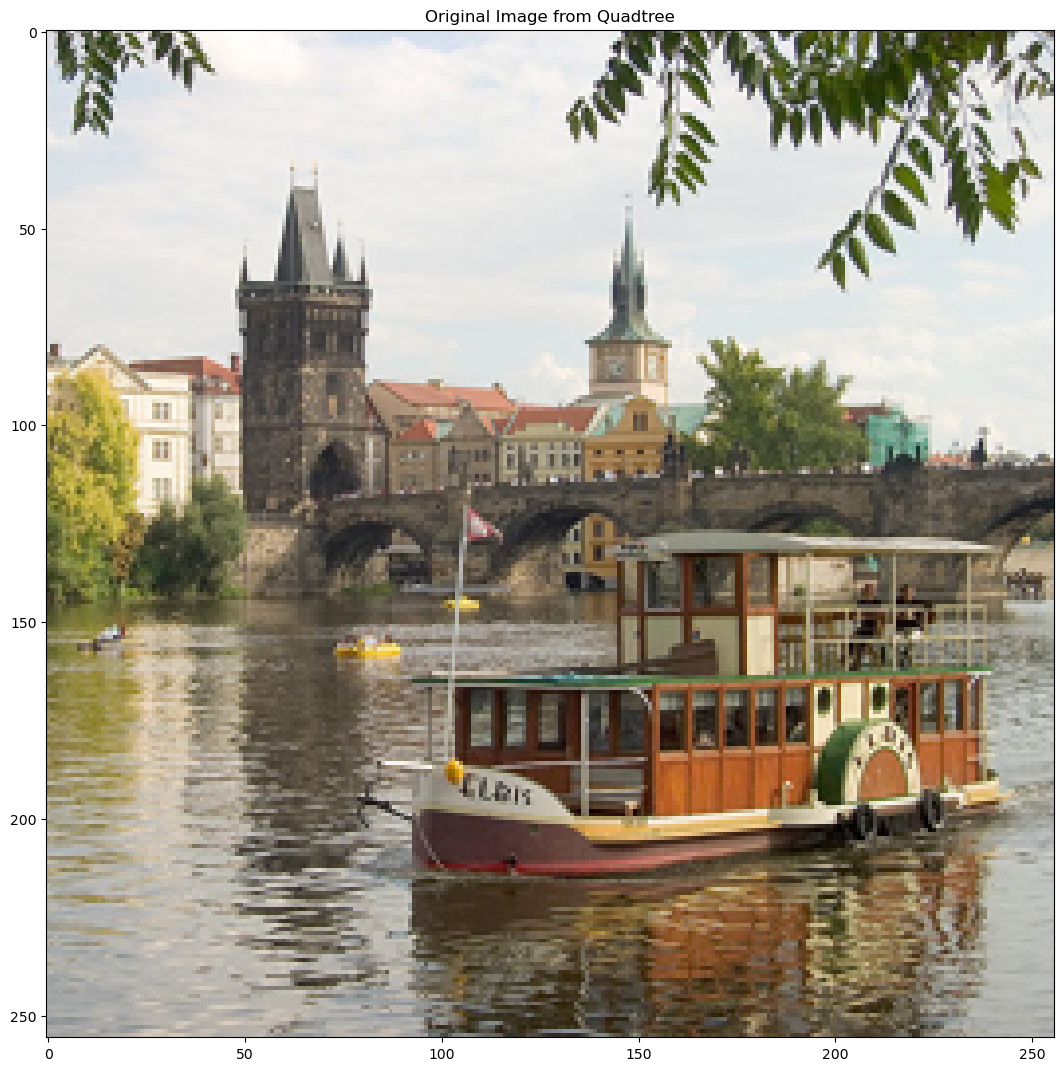

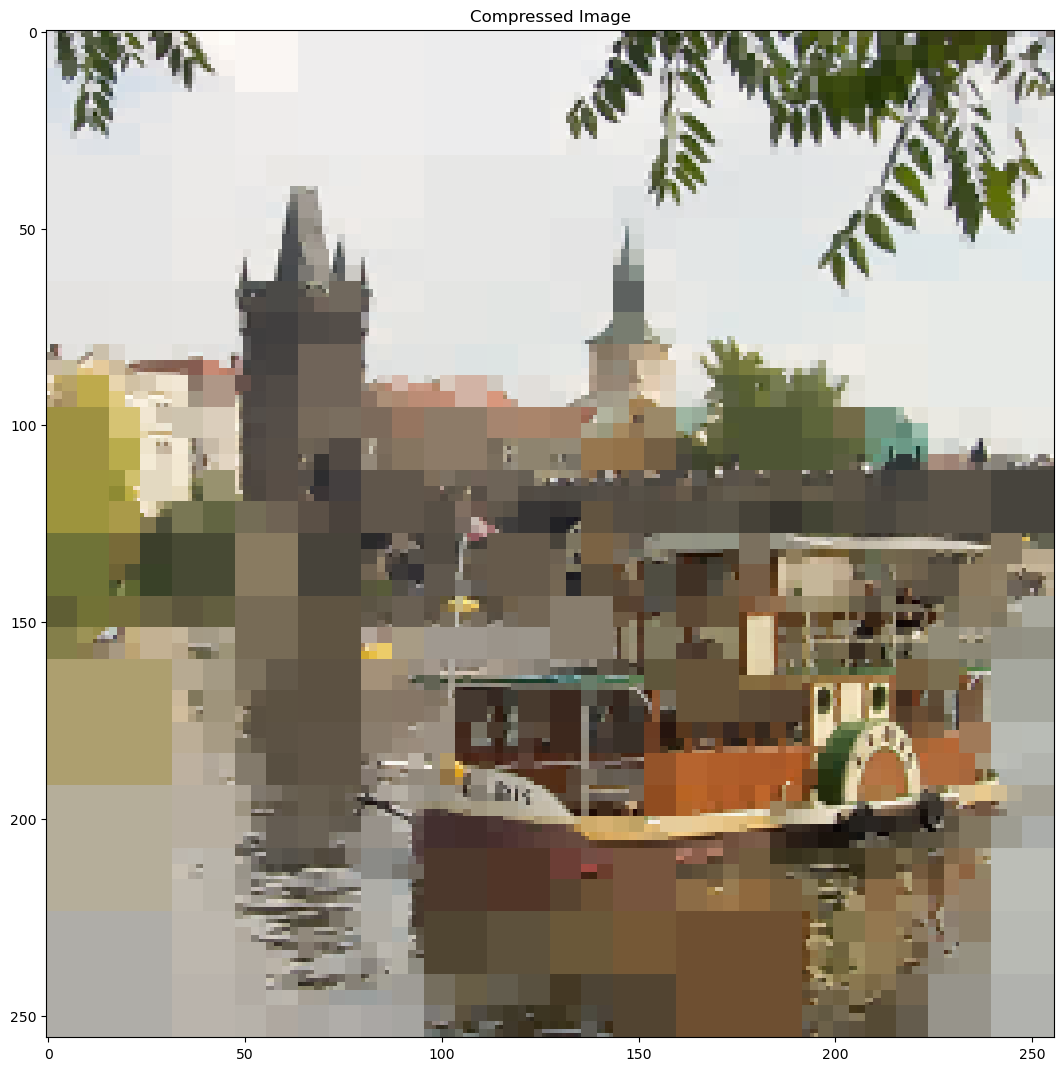

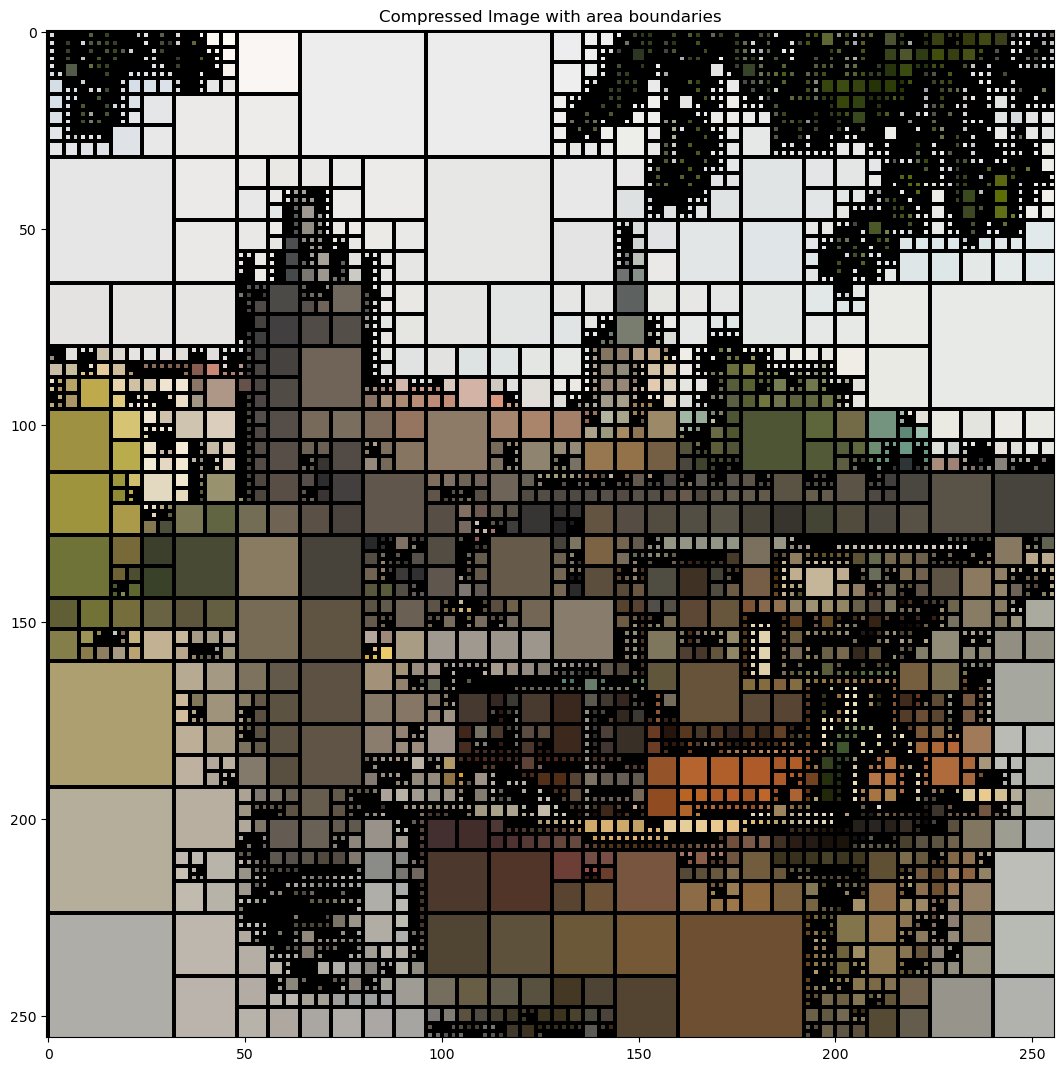


maximum number of nodes you should expect
87381.0
# of nodes before compression
87381
# of nodes after compression
11677


'2025-05-16 00:39:00'

In [69]:
from quadtree import *
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 18]

# prague example
image = mpimg.imread("figures/prague_square_256.png")
quadtree = Quadtree(image)
build_quadtree(quadtree)
image_reconstruct = quadtree_to_image(quadtree)
print('Check if the real image is correctly reconstructed from its quadtree')
print('np.array_equiv(image, image_reconstruct): ' + str(np.array_equiv(image, image_reconstruct)))

num_nodes = count_nodes(quadtree.root)

plt.imshow(image_reconstruct)
plt.title("Original Image from Quadtree")
plt.show()

compress_quadtree(quadtree, 0.05)
comp_image = quadtree_to_image(quadtree)
plt.imshow(comp_image)
plt.title("Compressed Image")
plt.show()

compress_quadtree(quadtree, 0.05)
comp_image = quadtree_to_image(quadtree, True)
plt.imshow(comp_image)
plt.title("Compressed Image with area boundaries")
plt.show()

print('\nmaximum number of nodes you should expect')
print(max_num_nodes(256))
print('# of nodes before compression')
print(num_nodes)
print('# of nodes after compression')
print(count_nodes(quadtree.root))

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Check if the real image is correctly reconstructed from its quadtree
np.array_equiv(image, image_reconstruct): True


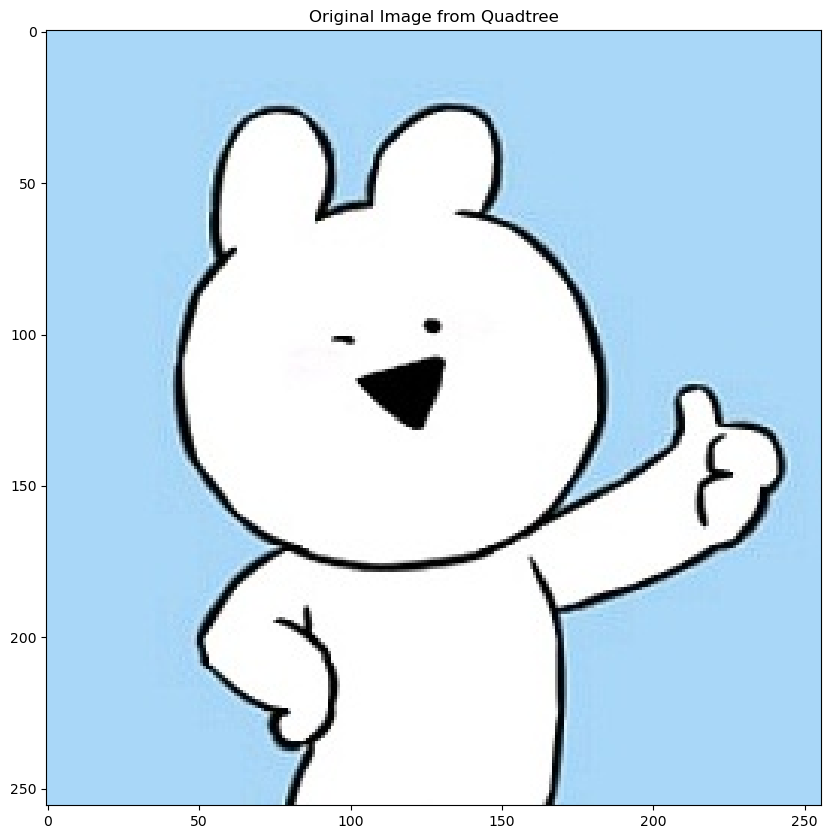

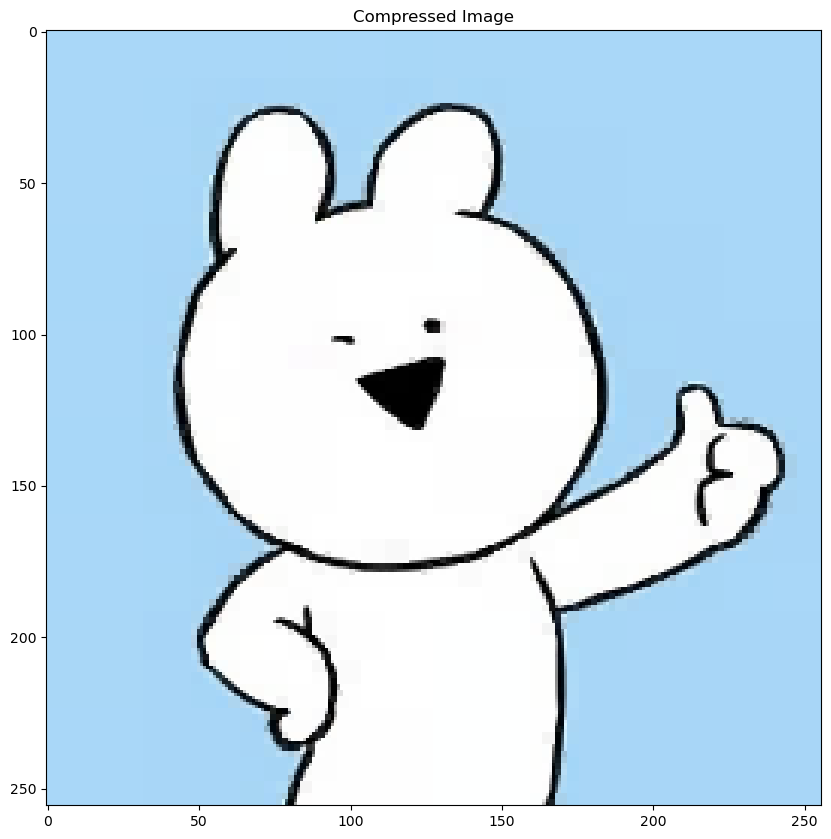

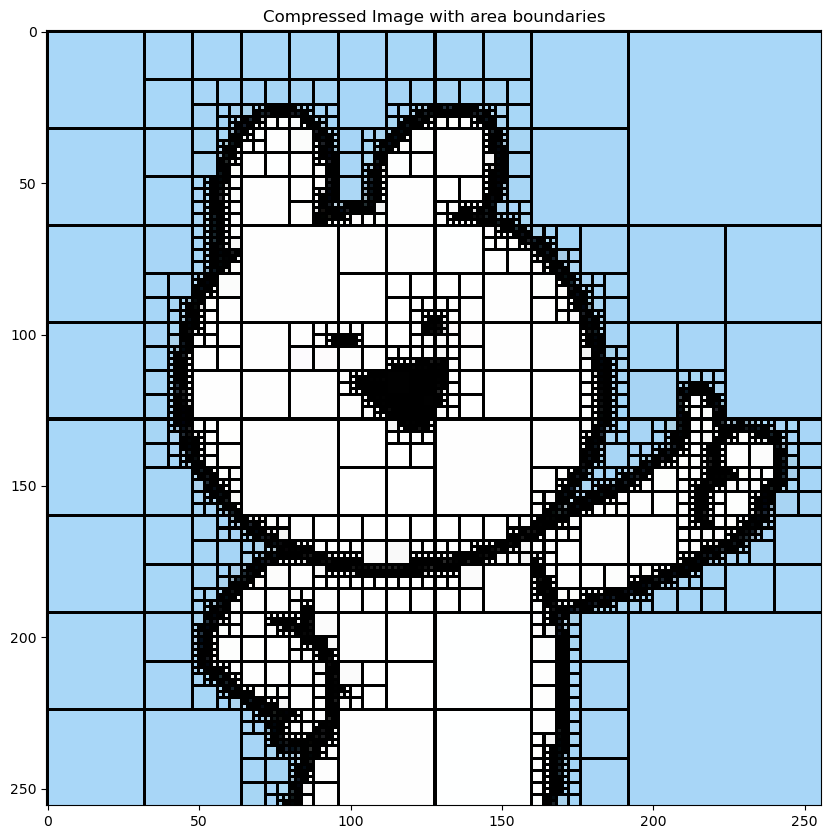


maximum number of nodes you should expect
87381.0
# of nodes before compression
87381
# of nodes after compression
6201


'2025-05-16 00:39:05'

In [70]:
from quadtree import *
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 13]

# Overaction Rabbit example
image = mpimg.imread("figures/rabbit.png")
quadtree = Quadtree(image)
build_quadtree(quadtree)
image_reconstruct = quadtree_to_image(quadtree)
print('Check if the real image is correctly reconstructed from its quadtree')
print('np.array_equiv(image, image_reconstruct): ' + str(np.array_equiv(image, image_reconstruct)))

num_nodes = count_nodes(quadtree.root)

plt.imshow(image_reconstruct)
plt.title("Original Image from Quadtree")
plt.show()

compress_quadtree(quadtree, 0.10)
comp_image = quadtree_to_image(quadtree)
plt.imshow(comp_image)
plt.title("Compressed Image")
plt.show()

compress_quadtree(quadtree, 0.10)
comp_image = quadtree_to_image(quadtree, True)
plt.imshow(comp_image)
plt.title("Compressed Image with area boundaries")
plt.show()

print('\nmaximum number of nodes you should expect')
print(max_num_nodes(256))
print('# of nodes before compression')
print(num_nodes)
print('# of nodes after compression')
print(count_nodes(quadtree.root))

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Check if the real image is correctly reconstructed from its quadtree
np.array_equiv(image, image_reconstruct): True


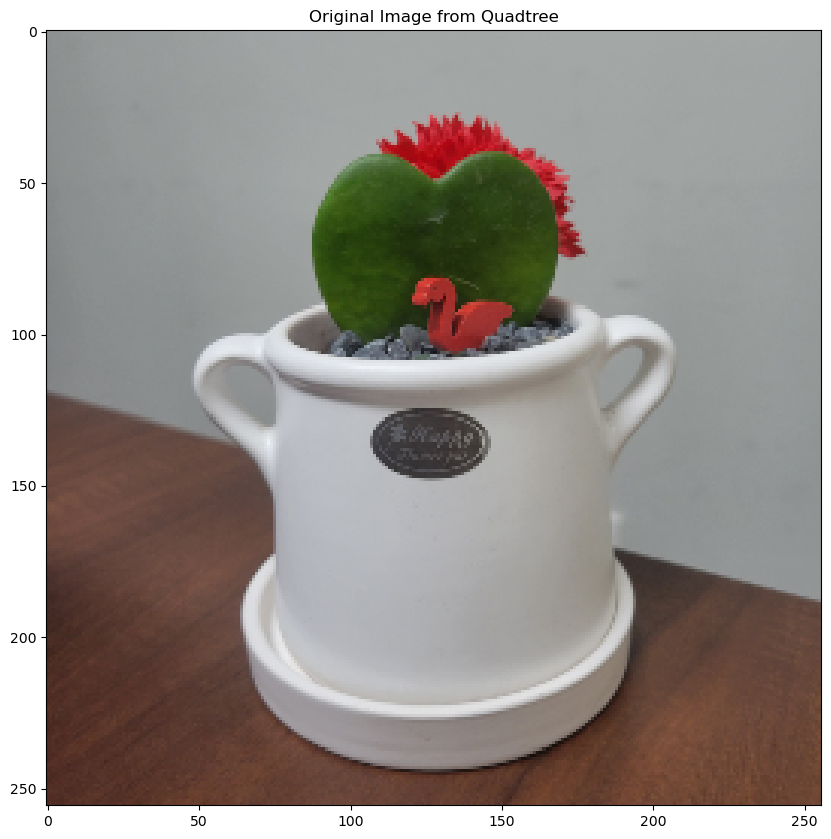

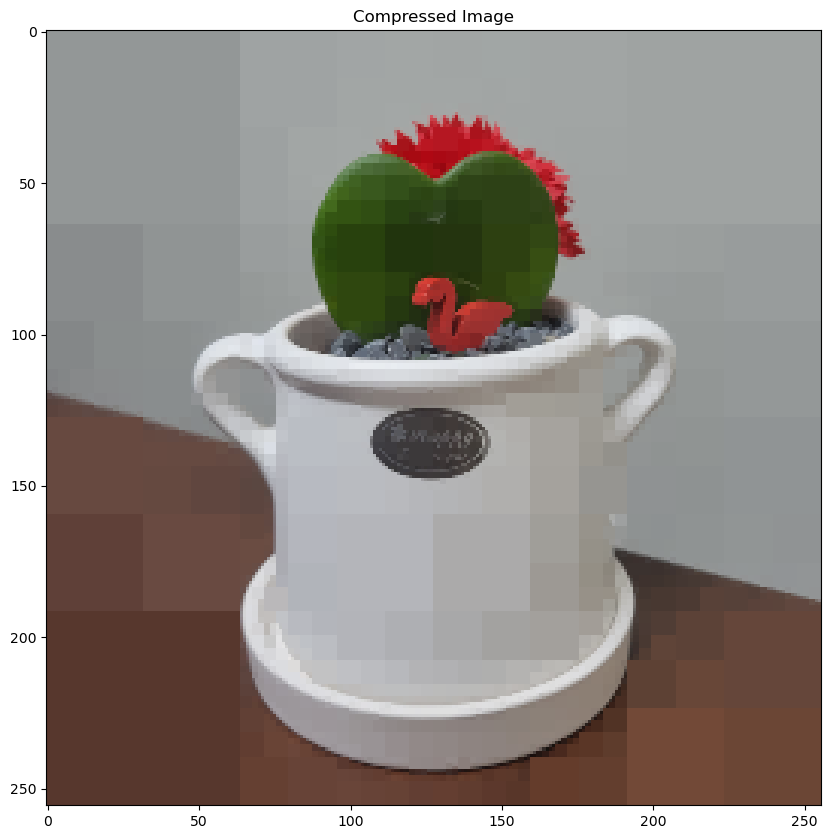

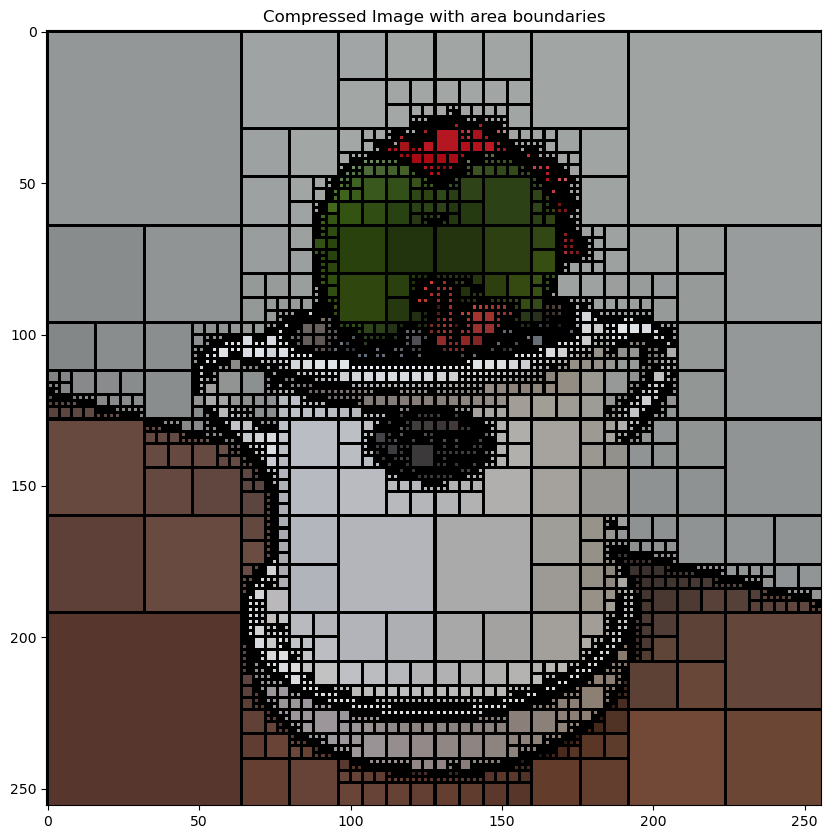


maximum number of nodes you should expect
87381.0
# of nodes before compression
87381
# of nodes after compression
7377


'2025-05-16 00:39:11'

In [71]:
from quadtree import *
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 13]

# Overaction Rabbit example
image = mpimg.imread("figures/pot.png")
quadtree = Quadtree(image)
build_quadtree(quadtree)
image_reconstruct = quadtree_to_image(quadtree)
print('Check if the real image is correctly reconstructed from its quadtree')
print('np.array_equiv(image, image_reconstruct): ' + str(np.array_equiv(image, image_reconstruct)))

num_nodes = count_nodes(quadtree.root)

plt.imshow(image_reconstruct)
plt.title("Original Image from Quadtree")
plt.show()

compress_quadtree(quadtree, 0.005)
comp_image = quadtree_to_image(quadtree)
plt.imshow(comp_image)
plt.title("Compressed Image")
plt.show()

compress_quadtree(quadtree, 0.005)
comp_image = quadtree_to_image(quadtree, True)
plt.imshow(comp_image)
plt.title("Compressed Image with area boundaries")
plt.show()

print('\nmaximum number of nodes you should expect')
print(max_num_nodes(256))
print('# of nodes before compression')
print(num_nodes)
print('# of nodes after compression')
print(count_nodes(quadtree.root))

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#### End of HW3:
1. Part 2 is more for fun, and it's what HW3 is about. Of course, this is not the best compression algorithm, but it's a known algorithm which has some educational purpose.
2. `np.array_equiv` is used to check if the image is correctly reconstructed from the quadtree.
3. Feel free to try various `threshold` values. 